# Imports

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

# Read Data

In [5]:
data = pd.read_csv('HCV-Egy-Data.csv')

In [6]:
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [7]:
data[data.columns[1:]].corr()['Baselinehistological staging'][:].sort_values()

BMI                                -0.057259
Epigastric pain                    -0.052110
Baseline histological Grading      -0.047072
RNA 4                              -0.032946
Fever                              -0.030975
AST 1                              -0.025126
RNA EOT                            -0.017486
Plat                               -0.017284
ALT4                               -0.014997
ALT 48                             -0.013533
ALT 36                             -0.006430
Diarrhea                           -0.005639
ALT 24                             -0.004888
Headache                           -0.001996
ALT 12                              0.000809
HGB                                 0.002752
RBC                                 0.009623
Gender                              0.011955
Fatigue & generalized bone ache     0.014563
WBC                                 0.017945
Jaundice                            0.020219
RNA Base                            0.029411
RNA EF    

**Correlation isnt helping**

# Trial 1

## Discretize all features

In [8]:
trial1 = pd.read_csv('HCV-Egy-Data.csv')

In [9]:
trial1["Age"] = np.where(trial1["Age"] <= 32,0,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(32,37),1,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(37,42),2,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(42,47),3,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(47,52),4,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(52,57),5,trial1["Age"])
trial1["Age"] = np.where(trial1["Age"].between(57,62),6,trial1["Age"])

In [10]:
trial1["BMI"] = np.where(trial1["BMI"].between(-1,18.5, inclusive = False),0,trial1["BMI"])
trial1["BMI"] = np.where(trial1["BMI"].between(18.5,24),1,trial1["BMI"])
trial1["BMI"] = np.where(trial1["BMI"].between(25,29),2,trial1["BMI"])
trial1["BMI"] = np.where(trial1["BMI"].between(30,34),3,trial1["BMI"])
trial1["BMI"] = np.where(trial1["BMI"].between(35,40),4,trial1["BMI"])

In [11]:
trial1["WBC"] = np.where(trial1["WBC"].between(0,3981),0,trial1["WBC"])
trial1["WBC"] = np.where(trial1["WBC"].between(4000,10987),1,trial1["WBC"])
trial1["WBC"] = np.where(trial1["WBC"].between(11000,12101),2,trial1["WBC"])

In [12]:
trial1["RBC"] = np.where(trial1["RBC"].between(0,3e+06),0,trial1["RBC"])
trial1["RBC"] = np.where(trial1["RBC"].between(3e+06,5e+06),1,trial1["RBC"])
trial1["RBC"] = np.where(trial1["RBC"] >= 5e+06,2,trial1["RBC"])

In [13]:
trial1['HGB'].loc[(trial1['HGB'] <= 13) & (trial1['Gender']==1)]= 0
trial1['HGB'].loc[(trial1['HGB'] <= 17.5) & (trial1['HGB'] != 0) & (trial1['Gender']==1)]= 1
trial1['HGB'].loc[(trial1['HGB'] > 17.5) & (trial1['HGB']!=1) & (trial1['Gender']==1)]= 2
trial1['HGB'].loc[(trial1['HGB'] < 12.3) & (trial1['Gender']==2)]= 0
trial1['HGB'].loc[(trial1['HGB'] < 15.3) & (trial1['HGB']!=0) & (trial1['Gender']==2)]= 1
trial1['HGB'].loc[(trial1['HGB'] >= 15.3) & (trial1['HGB']!=1) & (trial1['Gender']==2)]= 2

In [14]:
trial1['Plat'].loc[(trial1['Plat'] >= 93013) & (trial1['Plat']<100000)]= 0
trial1['Plat'].loc[(trial1['Plat'] >= 100000) & (trial1['Plat']< 255000)]= 1
trial1['Plat'].loc[(trial1['Plat'] >= 255000)]= 2

In [15]:
trial1['AST 1'].loc[(trial1['AST 1']<20)]= 0
trial1['AST 1'].loc[(trial1['AST 1']>=20) & (trial1['AST 1'] < 40)]= 1
trial1['AST 1'].loc[(trial1['AST 1']>=40)]= 2

In [16]:
trial1['ALT 1'].loc[(trial1['ALT 1']>=0) & (trial1['ALT 1']<20)]= 0
trial1['ALT 1'].loc[(trial1['ALT 1']>=20) & (trial1['ALT 1']<40)]= 1
trial1['ALT 1'].loc[(trial1['ALT 1']>=40)]= 2

In [17]:
trial1['ALT4'].loc[(trial1['ALT4']>=0) & (trial1['ALT4']<20)]= 0
trial1['ALT4'].loc[(trial1['ALT4']>=20) & (trial1['ALT4']<40)]= 1
trial1['ALT4'].loc[(trial1['ALT4']>=40)]= 2

In [18]:
trial1['ALT 12'].loc[(trial1['ALT 12']>=0) & (trial1['ALT 12']<20)]= 0
trial1['ALT 12'].loc[(trial1['ALT 12']>=20) & (trial1['ALT 12']<40)]= 1
trial1['ALT 12'].loc[(trial1['ALT 12']>=40)]= 2

In [19]:
trial1['ALT 24'].loc[(trial1['ALT 24']>=0) & (trial1['ALT 24']<20)]= 0
trial1['ALT 24'].loc[(trial1['ALT 24']>=20) & (trial1['ALT 24']<40)]= 1
trial1['ALT 24'].loc[(trial1['ALT 24']>=40)]= 2

In [20]:
trial1['ALT 36'].loc[(trial1['ALT 36']>=0) & (trial1['ALT 36']<20)]= 0
trial1['ALT 36'].loc[(trial1['ALT 36']>=20) & (trial1['ALT 36']<40)]= 1
trial1['ALT 36'].loc[(trial1['ALT 36']>=40)]= 2

In [21]:
trial1['ALT 48'].loc[(trial1['ALT 48']>=0) & (trial1['ALT 48']<20)]= 0
trial1['ALT 48'].loc[(trial1['ALT 48']>=20) & (trial1['ALT 48']<40)]= 1
trial1['ALT 48'].loc[(trial1['ALT 48']>=40)]= 2

In [22]:
trial1['ALT after 24 w'].loc[(trial1['ALT after 24 w']>=0) & (trial1['ALT after 24 w']<20)]= 0
trial1['ALT after 24 w'].loc[(trial1['ALT after 24 w']>=20) & (trial1['ALT after 24 w']<40)]= 1
trial1['ALT after 24 w'].loc[(trial1['ALT after 24 w']>=40)]= 2

In [23]:
trial1['RNA Base'].loc[(trial1['RNA Base']<=5)]= 0
trial1['RNA Base'].loc[(trial1['RNA Base']>5)]= 1

In [24]:
trial1['RNA 4'].loc[(trial1['RNA 4']<=5)]= 0
trial1['RNA 4'].loc[(trial1['RNA 4']>5)]= 1

In [25]:
trial1['RNA 12'].loc[(trial1['RNA 12']<=5)]= 0
trial1['RNA 12'].loc[(trial1['RNA 12']>5)]= 1

In [26]:
trial1['RNA EOT'].loc[(trial1['RNA EOT']<=5)]= 0
trial1['RNA EOT'].loc[(trial1['RNA EOT']>5)]= 1

In [27]:
trial1['RNA EF'].loc[(trial1['RNA EF']<=5)]= 0
trial1['RNA EF'].loc[(trial1['RNA EF']>5)]= 1

In [28]:
trial1['RNA EF'].value_counts()

1    1003
0     382
Name: RNA EF, dtype: int64

In [29]:
trial1.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

## Visualization after discretization

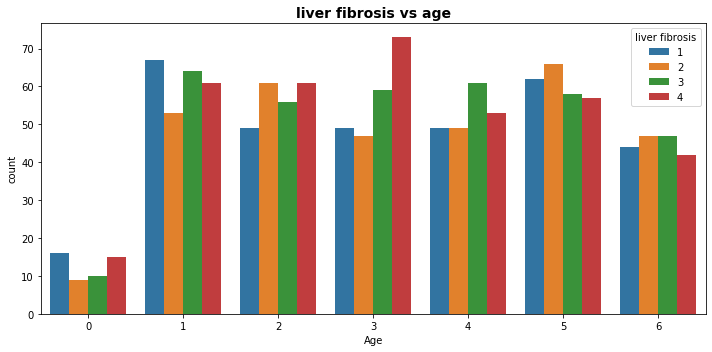

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Age'], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs age')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

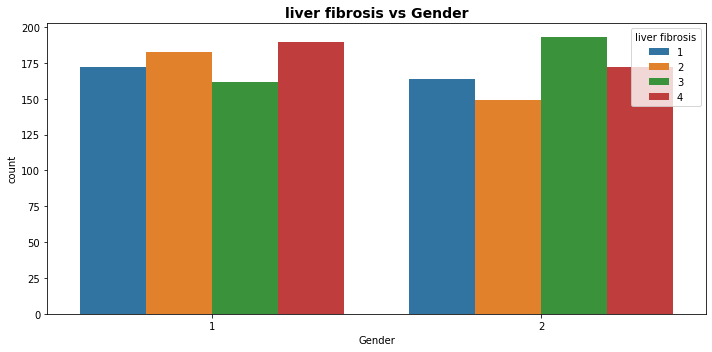

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Gender'], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Gender')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

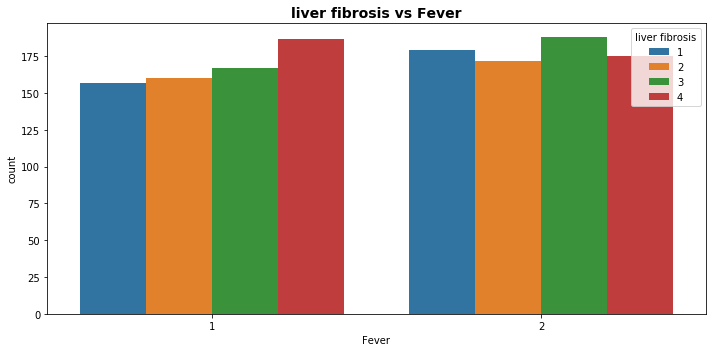

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Fever'], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Fever')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

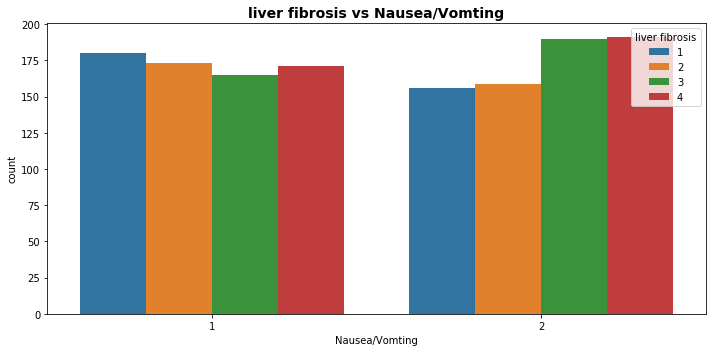

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Nausea/Vomting'], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Nausea/Vomting')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

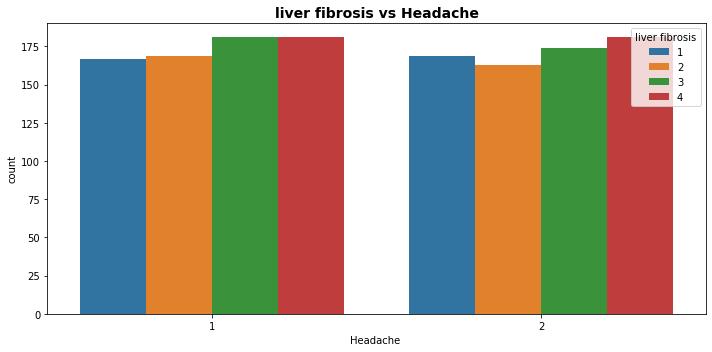

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Headache '], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Headache')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

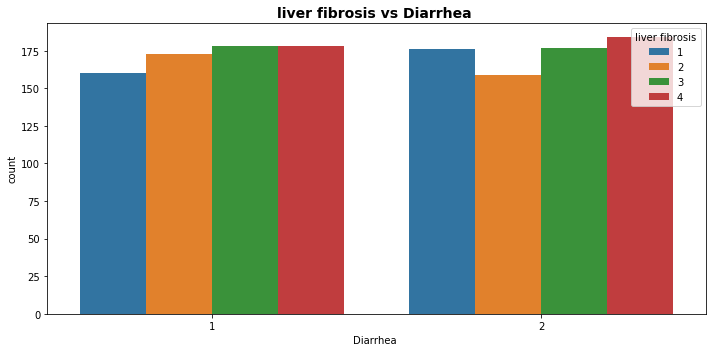

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Diarrhea '], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Diarrhea ')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

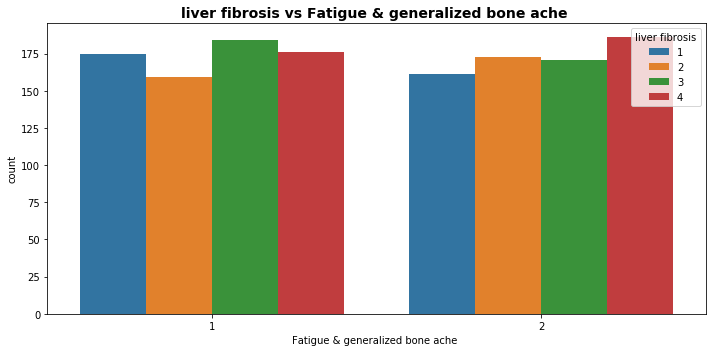

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Fatigue & generalized bone ache '], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Fatigue & generalized bone ache ')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

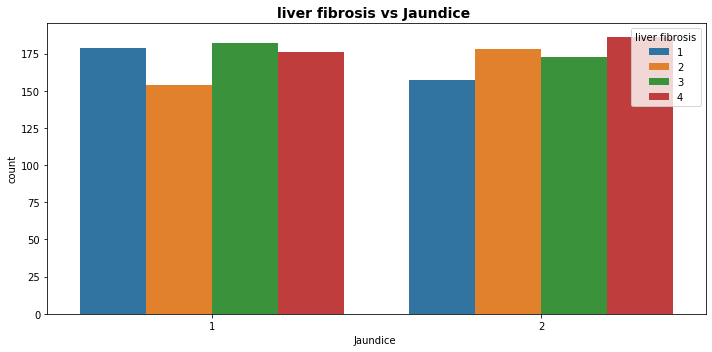

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(trial1['Jaundice '], hue=trial1["Baselinehistological staging"], ax=ax)
ax.set_title(fontsize=14, fontweight='bold',label='liver fibrosis vs Jaundice ')
ax.legend(title="liver fibrosis", loc='upper right') 
plt.tight_layout() 

## Model trials

In [31]:
random_state = 44
y = trial1.iloc[:,-1]
X = trial1.iloc[:,0:len(trial1.columns)-1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = random_state) # 0.25 x 0.8 = 0.2

In [33]:
clf = ExtraTreesClassifier(max_depth=2, random_state=random_state,n_estimators=10)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=2, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=44, verbose=0,
                     warm_start=False)

In [34]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.259927797833935

In [35]:
clf.feature_importances_ 

array([0.05555194, 0.1221993 , 0.14335592, 0.07911507, 0.07480489,
       0.        , 0.        , 0.07406882, 0.        , 0.0962938 ,
       0.        , 0.0583089 , 0.02841551, 0.        , 0.06943098,
       0.        , 0.0250633 , 0.        , 0.        , 0.        ,
       0.        , 0.02072596, 0.        , 0.05088735, 0.03101255,
       0.04734439, 0.        , 0.02342133])

In [36]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [37]:
clf.fit(X_train_new, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=2, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=44, verbose=0,
                     warm_start=False)

In [38]:
y_pred = clf.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.2851985559566787

In [39]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.24548736462093862

In [41]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),
...                         n_estimators=100, random_state=random_state).fit(X_train, y_train)

In [42]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.24187725631768953

In [43]:
clf = RandomForestClassifier(max_depth=2, criterion='entropy',random_state=random_state,max_samples=0.8)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)

In [44]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.24548736462093862

In [45]:
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.34747292418772563

In [46]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [47]:
clf.fit(X_train_new, y_train)
y_pred = clf.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.2743682310469314

In [48]:
y_pred = clf.predict(X_train_new)
accuracy_score(y_train, y_pred)

0.32581227436823107

# Trial 2

## Normalization of continuos features

In [102]:
trial2 = pd.read_csv('HCV-Egy-Data.csv')

In [86]:
trial2.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [3]:
cont_features = ['Age', 'BMI','WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
cat_features = ['Gender','Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ','Baseline histological Grading']

In [103]:
random_state = 44
y = trial2.iloc[:,-1]
X = trial2.iloc[:,0:len(trial2.columns)-1]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)

In [83]:
X_test.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
463,36,2,28,1,1,2,2,1,2,2,...,71,105,91,45,635825,570195,110371,741711,693095,5
807,50,2,32,2,1,1,1,1,2,1,...,53,68,101,32,407032,546044,5,5,5,8
957,39,2,22,2,1,2,1,2,2,2,...,78,122,106,39,683841,1185549,5,5,5,6
798,40,1,27,2,2,1,2,2,1,2,...,59,82,120,28,1171382,668508,2517,748839,481740,13
538,45,2,22,1,1,2,2,2,1,2,...,86,51,60,25,581841,202483,787967,464681,339519,10


In [135]:
scaler = preprocessing.StandardScaler().fit(X_train[cont_features])
X_test_sc = pd.DataFrame(scaler.transform(X_test[cont_features]),columns=cont_features)
X_train_sc = pd.DataFrame(scaler.transform(X_train[cont_features]),columns=cont_features)

In [117]:
X_train_sc.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03
mean,9.939903e-17,-3.863736e-16,1.763531e-17,-1.208019e-15,-4.488988e-16,-2.468944e-16,-6.412841e-18,6.092199e-17,-7.054125e-17,1.474953e-16,-1.090183e-16,-9.619261e-18,-2.613233e-16,4.513037e-16,8.416853e-17,-6.412841e-17,-7.695409e-17,4.168346e-17,1.923852e-17
std,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00
min,-1.618509e+00,-1.617524e+00,-1.698983e+00,-1.732929e+00,-1.482043e+00,-1.668674e+00,-1.711971e+00,-1.732794e+00,-1.665686e+00,-1.721983e+00,-1.707797e+00,-2.969398e+00,-2.971766e+00,-3.985935e+00,-1.676889e+00,-1.657118e+00,-9.911532e-01,-1.077012e+00,-1.070198e+00
25%,-9.341707e-01,-8.834102e-01,-8.732475e-01,-8.737502e-01,-9.022039e-01,-8.970617e-01,-8.510233e-01,-8.402518e-01,-8.352277e-01,-8.705449e-01,-8.339239e-01,-8.511012e-01,-8.443689e-01,-8.845194e-01,-9.022582e-01,-9.128265e-01,-9.911532e-01,-1.077012e+00,-1.070198e+00
50%,-2.172011e-02,9.540830e-02,-8.279795e-03,6.598828e-02,2.574735e-01,7.806048e-03,9.924779e-03,-2.532208e-02,-4.251771e-02,1.959538e-02,-3.603989e-02,1.891336e-02,-8.605864e-03,-3.867864e-02,4.083461e-03,-2.138562e-03,-2.068733e-01,-1.543403e-01,-1.745787e-01
75%,8.907305e-01,8.295221e-01,9.146065e-01,8.539927e-01,8.373122e-01,8.350240e-01,8.317389e-01,8.284138e-01,9.011846e-01,8.323322e-01,8.758276e-01,8.889280e-01,8.651464e-01,8.071621e-01,8.417668e-01,8.511716e-01,8.162692e-01,8.611714e-01,8.798512e-01
max,1.689125e+00,1.563636e+00,1.687258e+00,1.711193e+00,1.417151e+00,1.721920e+00,1.770955e+00,1.720956e+00,1.693895e+00,1.722473e+00,1.673712e+00,1.683289e+00,1.700909e+00,1.653003e+00,1.736561e+00,1.654349e+00,1.190225e+01,1.983480e+00,1.973181e+00


In [136]:
normalizer = MinMaxScaler([0,1]).fit(X_train_sc)
X_test_cont = pd.DataFrame(normalizer.transform(X_test_sc),columns=cont_features)
X_train_cont = pd.DataFrame(normalizer.transform(X_train_sc),columns=cont_features)

In [119]:
X_train_cont.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.489325,0.508470,0.501731,0.503156,0.511191,0.492148,0.491532,0.501714,0.495802,0.499929,0.505040,0.638211,0.635988,0.706859,0.491259,0.500418,0.076873,0.351908,0.351648
std,0.302467,0.314493,0.295446,0.290481,0.345079,0.295067,0.287245,0.289671,0.297791,0.290453,0.295860,0.215027,0.214107,0.177418,0.293091,0.302117,0.077594,0.326892,0.328730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206897,0.230769,0.243850,0.249462,0.200000,0.227574,0.247191,0.258427,0.247191,0.247191,0.258427,0.455285,0.455285,0.550000,0.226935,0.224762,0.000000,0.000000,0.000000
50%,0.482759,0.538462,0.499286,0.522315,0.600000,0.494450,0.494382,0.494382,0.483146,0.505618,0.494382,0.642276,0.634146,0.700000,0.492456,0.499772,0.060828,0.301478,0.294285
75%,0.758621,0.769231,0.771826,0.751112,0.800000,0.738425,0.730337,0.741573,0.764045,0.741573,0.764045,0.829268,0.821138,0.850000,0.737862,0.757456,0.140182,0.633291,0.640751
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
X_test_cont = X_test_cont.reset_index(drop=True)
X_train_cont = X_train_cont.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [138]:
X_test_std = pd.concat([X_test_cont, X_test[cat_features]], axis=1)
X_train_std = pd.concat([X_train_cont, X_train[cat_features]], axis=1)

In [92]:
X_train_std.describe()

,index,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,...,RNA EF,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,Baseline histological Grading
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,-5.268311,-7.001025,-2.812731,-12.667960,-7.280430,-4.032764,-3.238198,-3.246235,-3.137861,...,-1.070217,1.485560,1.513538,1.509025,1.499097,1.497292,1.499097,1.489170,1.497292,9.802347
std,319.996354,0.114108,0.244815,0.000372,0.000003,0.580101,0.000025,0.039152,0.038824,0.037765,...,0.000004,0.500017,0.500042,0.500144,0.500225,0.500218,0.500225,0.500108,0.500218,4.043990
min,0.000000,-5.452912,-7.396841,-2.813363,-12.667964,-8.139775,-4.032806,-3.305194,-3.313478,-3.200738,...,-1.070221,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,276.750000,-5.374859,-7.217200,-2.813056,-12.667962,-7.803562,-4.032786,-3.271502,-3.278842,-3.169390,...,-1.070221,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
50%,553.500000,-5.270788,-6.977679,-2.812734,-12.667959,-7.131137,-4.032763,-3.237809,-3.247217,-3.139466,...,-1.070218,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
75%,830.250000,-5.166718,-6.798038,-2.812391,-12.667957,-6.794924,-4.032742,-3.205648,-3.214087,-3.103843,...,-1.070214,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,13.000000
max,1107.000000,-5.075656,-6.618397,-2.812104,-12.667955,-6.458711,-4.032720,-3.168893,-3.179451,-3.073920,...,-1.070210,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16.000000


In [142]:
from sklearn.svm import LinearSVC

In [153]:
clf = LinearSVC(C=0.01, penalty="l1", dual=False,random_state=random_state)
clf.fit(X_train_std,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=44, tol=0.0001,
          verbose=0)

In [154]:
y_pred = clf.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.2527075812274368

In [155]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [156]:
clf.fit(X_train_new,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=44, tol=0.0001,
          verbose=0)

In [157]:
y_pred = clf.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.26353790613718414

## Trial 2A

In [47]:
clinical = ['Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ']
prop = ['Gender','Age', 'BMI']
blood = ['WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'Baseline histological Grading']
dna = ['RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']

In [142]:
X_train_clinical = X_train_std[clinical]
X_train_prop = X_train_std[prop]
X_train_blood = X_train_std[blood]
X_train_dna = X_train_std[dna]
X_test_clinical = X_test_std[clinical]
X_test_prop = X_test_std[prop]
X_test_blood = X_test_std[blood]
X_test_dna = X_test_std[dna]

In [205]:
clf1 = ExtraTreesClassifier(max_depth=2, random_state=random_state,n_estimators=5)
clf2 = SVC(C=1.0, kernel='rbf', random_state=random_state)
clf3 = SVC(C=1.0, kernel='rbf', random_state=random_state)
clf4 = SVC(C=1.0, kernel='rbf', random_state=random_state)

In [206]:
clf_clinical = clf1.fit(X_train_clinical,y_train)
clf_prop = clf2.fit(X_train_prop,y_train)
clf_blood = clf3.fit(X_train_blood,y_train)
clf_dna = clf4.fit(X_train_dna,y_train)

In [189]:
X_test_clinical.shape

(277, 7)

In [207]:
y_pred_clinical = clf_clinical.predict(X_test_clinical)
acc_clinical = accuracy_score(y_test, y_pred_clinical)
y_pred_prop = clf_prop.predict(X_test_prop)
acc_prop = accuracy_score(y_test, y_pred_prop)
y_pred_blood = clf_blood.predict(X_test_blood)
acc_blood = accuracy_score(y_test, y_pred_blood)
y_pred_dna = clf_dna.predict(X_test_dna)
acc_dna = accuracy_score(y_test, y_pred_dna)

In [208]:
y_pred_vote = np.empty(y_test.shape)
for i in range(len(y_test)):
    array = [y_pred_clinical[i], y_pred_prop[i], y_pred_blood[i], y_pred_dna[i]]
    counts = np.unique(array, return_counts=True)
    y_pred_vote[i] = counts[0][np.argmax(counts[1])]

In [209]:
accuracy_score(y_test, y_pred_vote)

0.2851985559566787

In [210]:
avg_acc = (acc_dna+acc_blood+acc_prop+acc_clinical)/4
print(avg_acc)

0.26985559566787004
